<a href="https://colab.research.google.com/github/Martinluther123/Hamoye/blob/main/Hamoye_Stage_B_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset

In [2]:
df = pd.read_csv("energydata_complete.csv")

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#Question 12.


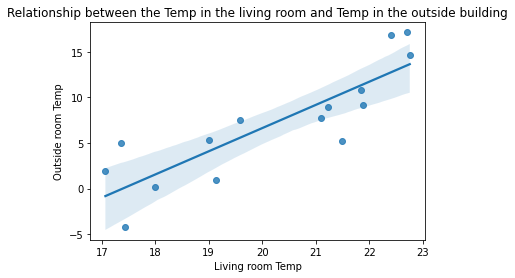

In [3]:

simple_linear_regression_df = df[["T2","T6"]].sample(15, random_state = 2)

sns.regplot(x = "T2", y="T6", data = simple_linear_regression_df)

plt.title('Relationship between the Temp in the living room and Temp in the outside building')
plt.xlabel('Living room Temp')
plt.ylabel('Outside room Temp')
plt.show()

#created a new variable for the features and Targeted variables for training and testing of the dataset.


In [4]:
x_features = df["T2"]
y_target = df["T6"]

#since a single feature was used for the trainning, the dataset was reshaped.

In [5]:
new_x = x_features.values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(new_x, y_target, test_size = 0.3)

In [7]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()



#FIT the model to a training dataset

In [8]:
linear_model.fit(x_train, y_train)


LinearRegression()

#obtained predicted values

In [9]:
predicted_values = linear_model.predict(x_test)


#The output below shows the R-squared (R2) for the relationship between the temperature in the living room in Celsius (T2)and the temperature outside the building (T6)

In [10]:
from sklearn.metrics import r2_score
Rs = r2_score(y_test, predicted_values)
round(Rs,2)

0.65

# Question 13.


#The date and light was dropped as instructed.

In [11]:
new_data = df.drop(columns=["date","lights"])

#The data was normalized to a common scale using min, max scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

normalized_df = pd.DataFrame(Scaler.fit_transform(new_data), columns = new_data.columns)

#In this case, the Targeted column was dropped and a new Target variable was created to contain the Targeted value.

In [13]:
features_df = normalized_df.drop(columns = ["Appliances"]) 

Target = normalized_df["Appliances"]

#The dataset was splited into training and testing dataset. Recall that the features and targeted variable were segmented.

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features_df, Target, test_size = 0.3, random_state = 42)


#FIT the model to a training dataset

In [15]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression()

# Predicted values obtained.

In [16]:
predicted_values = linear_model.predict(x_test)

#using Mean Absolute Error for Evaluation

#The output below shows the mean absolute error.

In [17]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)

print(round(mae,2))

0.05


#Question 14

#The output below shows the Residual Sum of Squares.

In [18]:
from sklearn.metrics import mean_squared_error

rss = rss = np.sum(np.square(y_test - predicted_values))

round(rss,2)

45.35

# Question 15

#The output below shows the  Root Mean Squared Error.

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse,2)

0.09

#Question 16.

#The output below shows the Coefficient of Determination.

In [20]:
from sklearn.metrics import r2_score
Rs = r2_score(y_test, predicted_values)
round(Rs,2)


0.15

#Question 17.

In [21]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5)

In [28]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of linear_weight and Ridge_weight
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(2)
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")

final_weights = pd.merge(linear_model_weights,ridge_weights_df, on = "Features")
linear_model_weights.sort_values(by=["Linear_Model_Weight"])


,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


#From the output above, it shows that RH_2 was the feature with the lowest weight and RH_1 was the feature with the highest weight.


#Question 18.

In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.4)

ridge_reg.fit(x_train, y_train)

pred = ridge_reg.predict(x_test)



#From the output below, it shows that the root mean square error changed when the model was trained on ridge regression with an alpha value of 0.4.

In [24]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred))

print(round(rmse_ridge,2))

0.09


# Question 19.

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)

#comparing the effects of regularization

In [26]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(2)
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weights_df = get_weights_df(lasso_reg, x_train, "Lasso_Weight")

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = "Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on ="Features")
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_Weight
0          RH_2            -0.456698     -0.411071     -0.000000
1         T_out            -0.321860     -0.262172      0.000000
2            T2            -0.236178     -0.201397      0.000000
3            T9            -0.189941     -0.188916     -0.000000
4          RH_8            -0.157595     -0.156830     -0.000110
5        RH_out            -0.077671     -0.054724     -0.049557
6          RH_7            -0.044614     -0.045977     -0.000000
7          RH_9            -0.039800     -0.041367     -0.000000
8            T5            -0.015657     -0.019853     -0.000000
9            T1            -0.003281     -0.018406      0.000000
10          rv1             0.000770      0.000748     -0.000000
11          rv2             0.000770      0.000748     -0.000000
12  Press_mm_hg             0.006839      0.006584     -0.000000
13           T7             0.010319      0.010098     -0.000000
14   Visibility          

#From the output above, it shows that 4 features("RH_8","RH_out","Windspeed","RH_1") have non-zero feature weights on the lasso_weight after undergoing lasso regression training with an alpha of 0.001

#Question 20.

In [27]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))

print(round(rmse_lasso,3))


0.094



#The above output is the new root mean square error